In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [203]:
print("Beginning Data Retrieval")
print("-----------------------------")
cities_df = []
record_count=1
set_count=1
for x in cities[0:100]:
    response = requests.get("http://api.openweathermap.org/data/2.5/weather?", params=dict(q=x, units="imperial", APPID=api_key))
    if response.status_code != 200:
        print("City not found. Skipping...")
    else:
        response = requests.get("http://api.openweathermap.org/data/2.5/weather?", params=dict(q=x, units="imperial", APPID=api_key)).json()
        print(f"Processing Record {record_count} of Set {set_count} | {x}")
        cities_df.append(response)
        record_count += 1
        if record_count == 51:
            record_count = 1
            set_count += 1
            
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | oranjemund
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | nouadhibou
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | puerto leguizamo
Processing Record 6 of Set 1 | mataura
City not found. Skipping...
Processing Record 7 of Set 1 | malanje
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | kupino
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | seydi
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set

In [205]:
## create dataframe from all responses
DF = pd.DataFrame(cities_df)

In [206]:
## reordering dataframe with city name as first column
cols = list(DF)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('name')))
# use ix to reorder
testDF = DF.loc[:, cols]

In [207]:
## function that extracts elements needed for output dataframe
def df_builder(x):
    list_appender = []
    list_appender.append(testDF['name'][x])
    list_appender.append(testDF['clouds'][x]['all'])
    list_appender.append(testDF['sys'][x]['country'])
    list_appender.append(testDF['dt'][x])
    list_appender.append(testDF['main'][x]["humidity"])
    list_appender.append(testDF['coord'][x]["lat"])
    list_appender.append(testDF['coord'][x]["lon"])
    list_appender.append(testDF['main'][x]["temp_max"])
    list_appender.append(testDF['wind'][x]["speed"])
    return list_appender
## set output data frame with desired columns    
outputDF=pd.DataFrame(columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
## use function to create dataframe with desired values and format
for x in range(len(testDF)):
    outputDF.loc[x] = df_builder(x)

In [208]:
##output sample
outputDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Oranjemund,68,ZA,1545190401,95,-28.55,16.43,61.57,0.58
1,Georgetown,20,GY,1545188400,94,6.80,-58.16,75.20,4.70
2,Nouadhibou,8,MR,1545188400,59,20.93,-17.03,64.40,14.99
3,Nikolskoye,75,RU,1545188400,85,59.70,30.79,15.80,8.95
4,Puerto Leguizamo,68,CO,1545190403,96,-0.19,-74.78,74.98,2.26


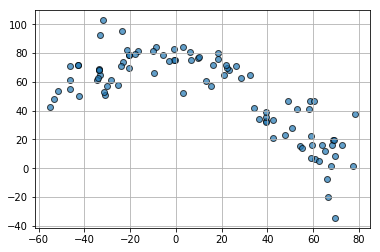

In [213]:
plt.scatter(outputDF['Lat'],outputDF["Max Temp"],alpha=.7,edgecolor='black')
plt.grid()